# Build a Regression Model in Keras

### Introduction to Deep Learning & Neural Networks with Keras
### IBM AI Engineering Professional Certificate
Gregory Peters

## Part A - Build a Baseline Model

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [3]:
concrete_data = pd.read_csv("concrete_data.csv")
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
concrete_data_columns = concrete_data.columns

X = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
y = concrete_data['Strength'] # Strength column
n_cols = X.shape[1]
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [5]:
# define regression model function to build a model based on required number of hidden layers
def regression_model(num_layers):
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    if(num_layers > 1):
        for i in range(1,num_layers):
            model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [6]:
model = regression_model(1)

In [7]:
# define a function to evaluate the model
def evaluate_model(model, X, y, epochs):
    mse_list = []
    for i in range(50):
        #split data into training/test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        # fit model with training data
        model.fit(X_train, y_train, epochs=epochs, verbose=0)
        # generate predictions from model
        y_pred = model.predict(X_test)
        # add mean squared error of predictions to list
        mse_list.append(mse(y_test, y_pred))
    mean = np.mean(mse_list)
    std = np.std(mse_list)
    
    return mean, std

In [8]:
base_mean, base_std = evaluate_model(model, X, y, 50)
print("Mean of Base MSE's: %0.3f, Standard Deviation of Base MSE's: %0.3f" % (base_mean, base_std))

Mean of Base MSE's: 50.979, Standard Deviation of Base MSE's: 10.183


## Part B - Normalize the Data

In [9]:
# normalize the data by subtracting the mean and dividing by the standard deviation
X_norm = (X - X.mean())/X.std()
X_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [10]:
norm_mean, norm_std = evaluate_model(model, X_norm, y, 50)
print("Mean of Normalized MSE's: %0.3f, Standard Deviation of Normalized MSE's: %0.3f" % (norm_mean, norm_std))

Mean of Normalized MSE's: 46.033, Standard Deviation of Normalized MSE's: 27.636


In [11]:
# define a simple function to plot a bar chart for visualization
def plot_bar(df):
    ax = plt.subplot()
    x_pos = np.arange(len(df['Model']))
    ax.bar(x_pos, df['Mean'], yerr=df['Std'])
    ax.set_ylabel('Mean of Mean Squared Errors of Model')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(df['Model'])
    ax.yaxis.grid(True)

In [12]:
means_df = pd.DataFrame(data={'Model' : ['Base', 'Normalized Data'],
           'Mean' : [base_mean, norm_mean],
           'Std' : [base_std, norm_std]})

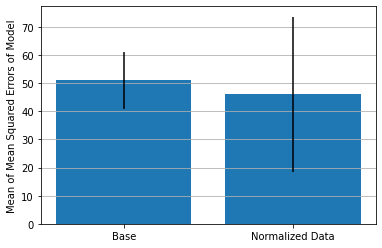

In [13]:
plot_bar(means_df)

Compared to Part A, the mean of the MSE's in Part B showed a slight improvement. The mean of the MSE's in part A was 50.979, whereas it went down to 46.033 in part B. While the mean of the MSE's went down, the standard deviation increased, as seen in the error bars of the bar chart.

## Part C - Increase the Number of Epochs

In [14]:
epoch_mean, epoch_std = evaluate_model(model, X_norm, y, 100)
print("Mean of Increased Epochs MSE's: %0.3f, Standard Deviation of Increased Epochs MSE's: %0.3f" 
      % (epoch_mean, epoch_std))

Mean of Increased Epochs MSE's: 30.062, Standard Deviation of Increased Epochs MSE's: 2.792


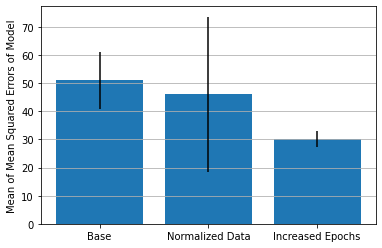

In [15]:
means_df.loc[len(means_df.index)] = ['Increased Epochs', epoch_mean, epoch_std]
plot_bar(means_df)

Similar to part B, increasing the number of epochs from 50 to 100 lowered the mean of the MSE's from 46.033 in part B to 30.062 in part C. Subsequently, the standard deviation of the mean of the MSE's also decreased significantly from part B.

## Part D - Increase the Number of Hidden Layers

In [16]:
layers_model = regression_model(3)
layers_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [17]:
layers_mean, layers_std = evaluate_model(layers_model, X_norm, y, 50)
print("Mean of Increased Layers MSE's: %0.3f, Standard Deviation of Increased LKayers MSE's: %0.3f" 
      % (layers_mean, layers_std))

Mean of Increased Layers MSE's: 29.967, Standard Deviation of Increased LKayers MSE's: 17.741


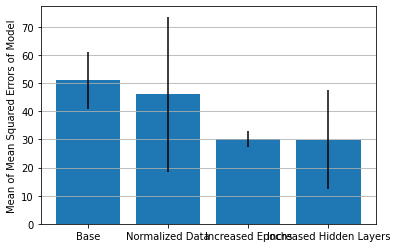

In [18]:
means_df.loc[len(means_df.index)] = ['Increased Hidden Layers', layers_mean, layers_std]
plot_bar(means_df)

Increasing the number of hidden layers from 1 to 3 showed similar results as increasing the number of epochs in part C did, when compared to part B. The mean of the MSE's ended up being 29.967, which is a marginal improvement over part C, but pretty significant from part B. However, in part D, the standard deviation increased to a similar point as in part B.